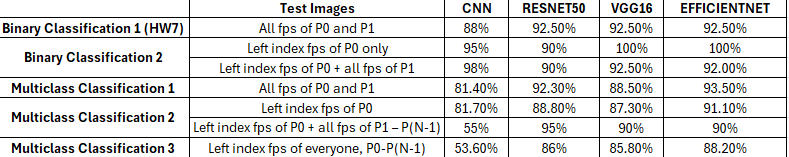

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow.keras

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/MyDrive/FPD/FPD_MC1_ALL'

train_dir = os.path.join(base_dir, 'train')
vali_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
# shuffle is True by default
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    vali_dir,
    image_size=(180, 180),
    batch_size=20) # was 32
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(180, 180),
    batch_size=10, # was 32
    shuffle=True)

Found 2680 files belonging to 17 classes.
Found 340 files belonging to 17 classes.
Found 340 files belonging to 17 classes.


In [ ]:
from tensorflow import keras
from keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(17, activation="softmax")(x)

CNN_model = tf.keras.Model(inputs, outputs)

CNN_model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
CNN_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, min_lr=1e-6)
]

# Initialize lists to store results
results = []
histories = []

# Fit the model
history = CNN_model.fit(train_dataset,batch_size=64, epochs=30, validation_data=validation_dataset, callbacks=callbacks)
# Store history
histories.append(history)
# Evaluate the model
evaluation = CNN_model.evaluate(test_dataset)

# Collect evaluation metrics
accuracy = evaluation[1]  # Assuming accuracy is the second element in the evaluation result

Epoch 1/30
84/84 [==============================] - 175s 2s/step - loss: 2.5480 - accuracy: 0.1422 - val_loss: 2.3080 - val_accuracy: 0.2029 - lr: 0.0010
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


84/84 [==============================] - 14s 153ms/step - loss: 1.9864 - accuracy: 0.3466 - val_loss: 1.7394 - val_accuracy: 0.4618 - lr: 0.0010
Epoch 3/30
84/84 [==============================] - 14s 156ms/step - loss: 1.5162 - accuracy: 0.5201 - val_loss: 1.5788 - val_accuracy: 0.4912 - lr: 0.0010
Epoch 4/30
84/84 [==============================] - 14s 153ms/step - loss: 1.2798 - accuracy: 0.6004 - val_loss: 1.2610 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 5/30
84/84 [==============================] - 14s 154ms/step - loss: 0.9582 - accuracy: 0.6996 - val_loss: 1.2148 - val_accuracy: 0.6647 - lr: 0.0010
Epoch 6/30
84/84 [==============================] - 14s 153ms/step - loss: 0.7927 - accuracy: 0.7571 - val_loss: 0.9370 - val_accuracy: 0.7265 - lr: 0.0010
Epoch 7/30
84/84 [==============================] - 14s 157ms/step - loss: 0.6292 - accuracy: 0.8019 - val_loss: 1.0103 - val_accuracy: 0.7147 - lr: 0.0010
Epoch 8/30
84/84 [==============================] - 14s 155ms/step - loss: 

In [ ]:
from sklearn.metrics import confusion_matrix

# Initialize lists for true labels and predicted labels
true_labels = []
pred_labels = []

# Iterate over the test dataset to collect true labels and predicted labels
for data, label in test_dataset:
    true_labels.append(label.numpy())  # Append true label
    pred_labels.append(np.argmax(CNN_model.predict(data), axis=1))  # Append predicted label

# Concatenate true labels and predicted labels into numpy arrays
y_true = np.concatenate(true_labels)
test_pred = np.concatenate(pred_labels)

# Compute confusion matrix
cm = confusion_matrix(y_true=y_true, y_pred=test_pred)
print(cm)


1/1 [==============================] - 0s 21ms/step
[[15  0  0  0  1  0  0  1  0  1  0  0  1  1  0  0  0]
 [ 0 19  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 16  0  0  0  0  0  1  1  1  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  1  3  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  0  3  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  2  1 13  0  1  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  1  0  0  0 17  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0 19  0  0  0  0]
 [ 0  2  0  1  0  0  0  1  0  1  0  0  0 11  1  1  2]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0 18  0  0]
 [ 0  1  1  0  0  1  0  0  1  0  0  0  0  4  0 12  0]
 [ 1  2  1  0  0  0  0  1  0  0  0  0  0  0  0  0 15]]


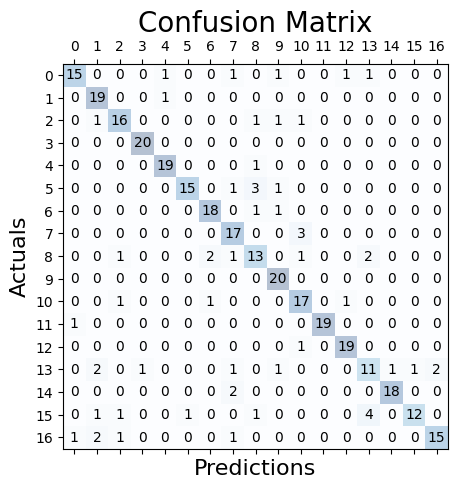

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator # to show all tick labels
fig, ax = plt.subplots(figsize=(5, 5)) # one subplot with size 5x5
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3) # alpha make the Blue light blue
ax.yaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
ax.xaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')

plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, test_pred, average='weighted')
recall = recall_score(y_true, test_pred, average='weighted')
f1 = f1_score(y_true, test_pred, average='weighted')

results.append({'Model': "CNN", 'Accuracy': accuracy, 'F1-Score': f1, 'Precision': precision, 'Recall': recall})

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.8388396308680687
Recall: 0.8323529411764706
F1-score: 0.8301580177490925


In [ ]:
# Input layer remains the same
inputs = tf.keras.Input(shape=(180, 180, 3))

x = tf.keras.applications.resnet.preprocess_input(inputs)

# Use a pre-trained model as the base
x = tf.keras.applications.ResNet50(include_top=False)(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(17, activation='softmax')(x)

# Create the model
Resnet_model = tf.keras.Model(inputs, outputs)

# Compile the model with the same parameters
Resnet_model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

Resnet_model.summary()

94765736/94765736 [==============================] - 3s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 180, 180, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 180, 180, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 global_average_pooling2d (  (None, 2048)              0    

In [ ]:
# Fit the model
history = Resnet_model.fit(train_dataset,batch_size=64, epochs=30, validation_data=validation_dataset, callbacks=callbacks)
# Store history
histories.append(history)
# Evaluate the model
evaluation = Resnet_model.evaluate(test_dataset)

# Collect evaluation metrics
accuracy = evaluation[1]  # Assuming accuracy is the second element in the evaluation result

Epoch 1/30
84/84 [==============================] - 50s 195ms/step - loss: 1.5104 - accuracy: 0.5593 - val_loss: 37.5888 - val_accuracy: 0.0676 - lr: 0.0010
Epoch 2/30
84/84 [==============================] - 15s 164ms/step - loss: 0.6864 - accuracy: 0.7884 - val_loss: 64.6086 - val_accuracy: 0.0588 - lr: 0.0010
Epoch 3/30
84/84 [==============================] - 15s 165ms/step - loss: 0.3921 - accuracy: 0.8854 - val_loss: 25.5992 - val_accuracy: 0.1647 - lr: 0.0010
Epoch 4/30
84/84 [==============================] - 15s 164ms/step - loss: 0.3299 - accuracy: 0.8929 - val_loss: 9.3895 - val_accuracy: 0.2588 - lr: 0.0010
Epoch 5/30
84/84 [==============================] - 15s 164ms/step - loss: 0.1739 - accuracy: 0.9511 - val_loss: 2.4526 - val_accuracy: 0.5147 - lr: 0.0010
Epoch 6/30
84/84 [==============================] - 15s 162ms/step - loss: 0.1644 - accuracy: 0.9478 - val_loss: 5.4068 - val_accuracy: 0.4147 - lr: 0.0010
Epoch 7/30
84/84 [==============================] - 15s 166ms

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


84/84 [==============================] - 16s 178ms/step - loss: 0.0212 - accuracy: 0.9940 - val_loss: 0.2690 - val_accuracy: 0.9412 - lr: 0.0010
Epoch 15/30
84/84 [==============================] - 16s 164ms/step - loss: 0.0888 - accuracy: 0.9743 - val_loss: 2.4696 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 16/30
84/84 [==============================] - 15s 165ms/step - loss: 0.1242 - accuracy: 0.9631 - val_loss: 2.7864 - val_accuracy: 0.5147 - lr: 0.0010
Epoch 17/30
84/84 [==============================] - 15s 163ms/step - loss: 0.0933 - accuracy: 0.9709 - val_loss: 2.5288 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 18/30
84/84 [==============================] - 15s 164ms/step - loss: 0.0546 - accuracy: 0.9817 - val_loss: 1.9020 - val_accuracy: 0.6853 - lr: 0.0010
Epoch 19/30
84/84 [==============================] - 15s 165ms/step - loss: 0.0497 - accuracy: 0.9828 - val_loss: 0.6843 - val_accuracy: 0.8529 - lr: 0.0010
Epoch 20/30
84/84 [==============================] - 15s 162ms/step - 

In [ ]:
# Initialize lists for true labels and predicted labels
true_labels = []
pred_labels = []

# Iterate over the test dataset to collect true labels and predicted labels
for data, label in test_dataset:
    true_labels.append(label.numpy())  # Append true label
    pred_labels.append(np.argmax(Resnet_model.predict(data), axis=1))  # Append predicted label

# Concatenate true labels and predicted labels into numpy arrays
y_true = np.concatenate(true_labels)
test_pred = np.concatenate(pred_labels)

# Compute confusion matrix
cm = confusion_matrix(y_true=y_true, y_pred=test_pred)
print(cm)


1/1 [==============================] - 0s 25ms/step
[[17  0  0  0  0  0  0  0  1  0  1  0  1  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0 14  1  0  2  0  0  0  1  1  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 19  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 18  1  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0 19  0  0  0  0]
 [ 0  4  1  0  0  0  0  0  0  0  0  0  0 14  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  1  0  0 17  1]
 [ 0  1  1  0  1  0  0  0  0  1  0  0  0  0  0  0 16]]


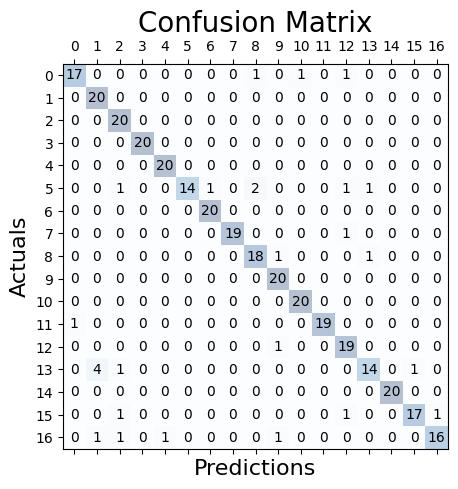

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5)) # one subplot with size 5x5
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3) # alpha make the Blue light blue
ax.yaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
ax.xaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')

plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

In [ ]:
precision = precision_score(y_true, test_pred, average='weighted')
recall = recall_score(y_true, test_pred, average='weighted')
f1 = f1_score(y_true, test_pred, average='weighted')

results.append({'Model': "Rsenet50", 'Accuracy': accuracy, 'F1-Score': f1, 'Precision': precision, 'Recall': recall})

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9263727400593657
Recall: 0.9205882352941176
F1-score: 0.9188926483804825


In [ ]:
# Adding a data augmentation stage and a classifier to the convolutional base
conv_base  = tf.keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

inputs = tf.keras.Input(shape=(180, 180, 3))
x = tf.keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)

outputs = layers.Dense(17, activation="softmax")(x)

Vgg_model = tf.keras.Model(inputs, outputs)

Vgg_model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])
Vgg_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 tf.__operators__.getitem_1  (None, 180, 180, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_1 (TFOpLamb  (None, 180, 180, 3)       0         
 da)                                                             
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
  (GlobalAveragePooling2D)                                  

In [ ]:
# Fit the model
history = Vgg_model.fit(train_dataset,batch_size=64, epochs=30, validation_data=validation_dataset, callbacks=callbacks)
# Store history
histories.append(history)
# Evaluate the model
evaluation = Vgg_model.evaluate(test_dataset)

# Collect evaluation metrics
accuracy = evaluation[1]  # Assuming accuracy is the second element in the evaluation result

Epoch 1/30
84/84 [==============================] - 19s 182ms/step - loss: 3.0051 - accuracy: 0.3899 - val_loss: 1.2174 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 2/30
84/84 [==============================] - 14s 158ms/step - loss: 1.1187 - accuracy: 0.6713 - val_loss: 1.0073 - val_accuracy: 0.7324 - lr: 0.0010
Epoch 3/30
84/84 [==============================] - 14s 156ms/step - loss: 0.7854 - accuracy: 0.7672 - val_loss: 0.7801 - val_accuracy: 0.7941 - lr: 0.0010
Epoch 4/30
84/84 [==============================] - 14s 156ms/step - loss: 0.6070 - accuracy: 0.8138 - val_loss: 0.6778 - val_accuracy: 0.7912 - lr: 0.0010
Epoch 5/30
84/84 [==============================] - 14s 153ms/step - loss: 0.4542 - accuracy: 0.8556 - val_loss: 0.6203 - val_accuracy: 0.8147 - lr: 0.0010
Epoch 6/30
84/84 [==============================] - 15s 158ms/step - loss: 0.4745 - accuracy: 0.8571 - val_loss: 0.4521 - val_accuracy: 0.8735 - lr: 0.0010
Epoch 7/30
84/84 [==============================] - 14s 158ms/st

In [ ]:
# Initialize lists for true labels and predicted labels
true_labels = []
pred_labels = []

# Iterate over the test dataset to collect true labels and predicted labels
for data, label in test_dataset:
    true_labels.append(label.numpy())  # Append true label
    pred_labels.append(np.argmax(Vgg_model.predict(data), axis=1))  # Append predicted label

# Concatenate true labels and predicted labels into numpy arrays
y_true = np.concatenate(true_labels)
test_pred = np.concatenate(pred_labels)

# Compute confusion matrix
cm = confusion_matrix(y_true=y_true, y_pred=test_pred)
print(cm)


1/1 [==============================] - 0s 22ms/step
[[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0 18  0  0  0  0  0  0  0  1  1  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  1  0  0  0  2  0  0  0]
 [ 0  0  1  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0 18  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0 18  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0 19  0  0  0  0]
 [ 2  1  0  0  2  0  0  1  0  3  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0]
 [ 0  2  2  0  0  0  0  0  1  1  0  0  0  1  0 13  0]
 [ 1  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0 17]]


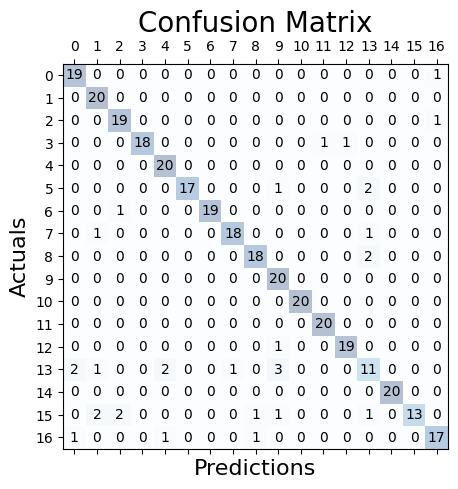

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5)) # one subplot with size 5x5
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3) # alpha make the Blue light blue
ax.yaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
ax.xaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')

plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

In [ ]:
precision = precision_score(y_true, test_pred, average='weighted')
recall = recall_score(y_true, test_pred, average='weighted')
f1 = f1_score(y_true, test_pred, average='weighted')

results.append({'Model': "Vgg16", 'Accuracy': accuracy, 'F1-Score': f1, 'Precision': precision, 'Recall': recall})

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9112321815468466
Recall: 0.9058823529411765
F1-score: 0.9036478671716953


In [ ]:
from tensorflow.keras.applications import EfficientNetB1

# Load the pre-trained EfficientNetB1 model without the top classification layer
base_model = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add a custom classification head
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(17, activation='softmax')(x)

# Create the final model
EfficientNet_model = tf.keras.Model(inputs=base_model.input, outputs=outputs)

# Compile the model
EfficientNet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
EfficientNet_model.summary()


27018416/27018416 [==============================] - 1s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, 180, 180, 3)          0         ['input_6[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 180, 180, 3)          7         ['rescaling_1[0][0]']         
 on)                                                                                              
                                                                                                  
 rescaling_2 (Rescaling)   

In [ ]:
# Fit the model
history = EfficientNet_model.fit(train_dataset,batch_size=64, epochs=30, validation_data=validation_dataset, callbacks=callbacks)
# Store history
histories.append(history)
# Evaluate the model
evaluation = EfficientNet_model.evaluate(test_dataset)

# Collect evaluation metrics
accuracy = evaluation[1]  # Assuming accuracy is the second element in the evaluation result

Epoch 1/30
84/84 [==============================] - 26s 185ms/step - loss: 1.7925 - accuracy: 0.4440 - val_loss: 1.1652 - val_accuracy: 0.6735 - lr: 0.0010
Epoch 2/30
84/84 [==============================] - 14s 156ms/step - loss: 1.0513 - accuracy: 0.6698 - val_loss: 0.8455 - val_accuracy: 0.7706 - lr: 0.0010
Epoch 3/30
84/84 [==============================] - 14s 154ms/step - loss: 0.7904 - accuracy: 0.7616 - val_loss: 0.6912 - val_accuracy: 0.8029 - lr: 0.0010
Epoch 4/30
84/84 [==============================] - 14s 155ms/step - loss: 0.6983 - accuracy: 0.7802 - val_loss: 0.5802 - val_accuracy: 0.8441 - lr: 0.0010
Epoch 5/30
84/84 [==============================] - 14s 154ms/step - loss: 0.6061 - accuracy: 0.8101 - val_loss: 0.5778 - val_accuracy: 0.8118 - lr: 0.0010
Epoch 6/30
84/84 [==============================] - 15s 160ms/step - loss: 0.5251 - accuracy: 0.8299 - val_loss: 0.4727 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 7/30
84/84 [==============================] - 14s 156ms/st

In [ ]:
# Initialize lists for true labels and predicted labels
true_labels = []
pred_labels = []

# Iterate over the test dataset to collect true labels and predicted labels
for data, label in test_dataset:
    true_labels.append(label.numpy())  # Append true label
    pred_labels.append(np.argmax(EfficientNet_model.predict(data), axis=1))  # Append predicted label

# Concatenate true labels and predicted labels into numpy arrays
y_true = np.concatenate(true_labels)
test_pred = np.concatenate(pred_labels)

# Compute confusion matrix
cm = confusion_matrix(y_true=y_true, y_pred=test_pred)
print(cm)


1/1 [==============================] - 0s 30ms/step
[[18  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0 18  0  0  0  0  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  1 18  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  2  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  1  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1 19  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0]
 [ 0  1  0  0  0  0  0  1  0  1  0  0  0 15  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  0]
 [ 0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0 18]]


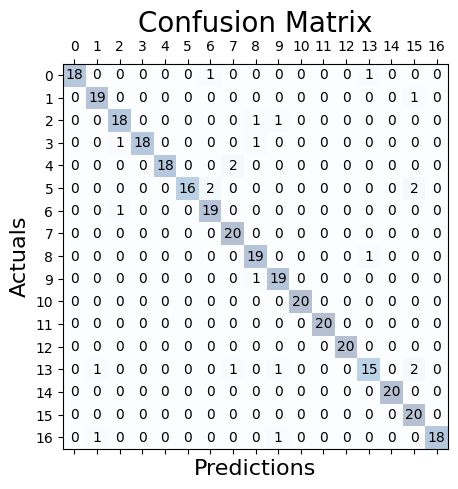

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5)) # one subplot with size 5x5
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3) # alpha make the Blue light blue
ax.yaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
ax.xaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')

plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

In [ ]:
precision = precision_score(y_true, test_pred, average='weighted')
recall = recall_score(y_true, test_pred, average='weighted')
f1 = f1_score(y_true, test_pred, average='weighted')

results.append({'Model': "Efficient", 'Accuracy': accuracy, 'F1-Score': f1, 'Precision': precision, 'Recall': recall})

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9380934796611041
Recall: 0.9323529411764706
F1-score: 0.9323182243245324


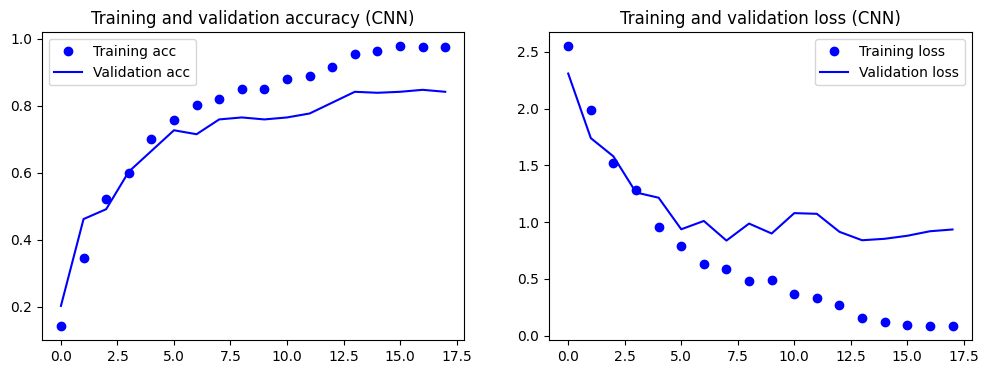

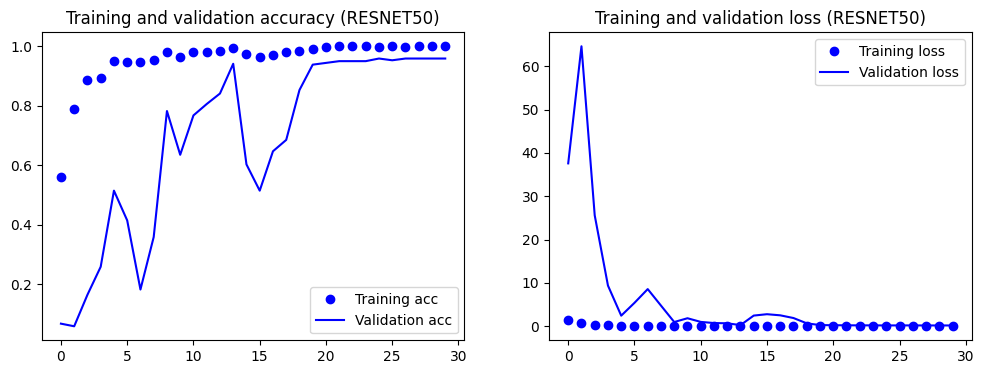

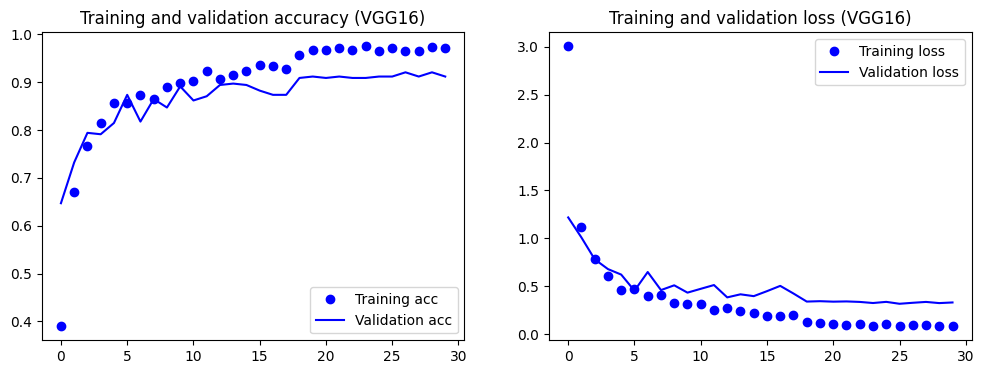

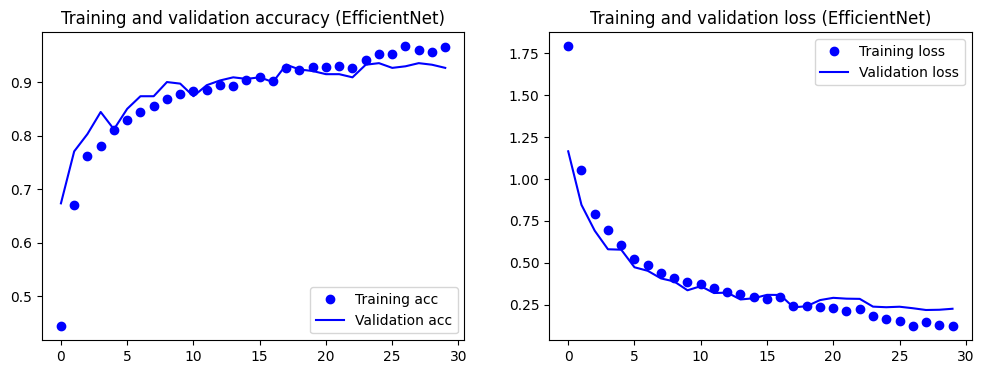

In [ ]:
import matplotlib.pyplot as plt

name = ['CNN', 'RESNET50', 'VGG16', 'EfficientNet']
for model_name, history in zip(name, histories):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 4)

    ax1.plot(epochs, acc, 'bo', label='Training acc')
    ax1.plot(epochs, val_acc, 'b', label='Validation acc')
    ax1.set_title(f'Training and validation accuracy ({model_name})')
    #ax1.set_ylim([0.6, 0.95])
    ax1.legend()

    ax2.plot(epochs, loss, 'bo', label='Training loss')
    ax2.plot(epochs, val_loss, 'b', label='Validation loss')
    #ax2.set_ylim([0.1,0.7]) # To compare with FE1
    ax2.set_title(f'Training and validation loss ({model_name})')
    ax2.legend()

    plt.show()

In [ ]:
X_test = []
y_test = []
for images, labels in test_dataset:
    X_test.append(images.numpy())
    y_test.append(labels.numpy())

# Convert lists to numpy arrays
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Predict probabilities for each model
probs_model1 = CNN_model.predict(X_test)
probs_model2 = Resnet_model.predict(X_test)
probs_model3 = Vgg_model.predict(X_test)
probs_model4 = EfficientNet_model.predict(X_test)

# Define weights for each model
weights = [0.1, 0.2, 0.3, 0.4]

# Combine probabilities from all models with weights
weighted_probs = np.average([probs_model1, probs_model2, probs_model3, probs_model4], axis=0, weights=weights)

# Predict the class with the highest weighted probability
ensemble_predictions = np.argmax(weighted_probs, axis=1)

# Evaluate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Validation Accuracy:", accuracy)

11/11 [==============================] - 1s 23ms/step
Validation Accuracy: 0.9558823529411765


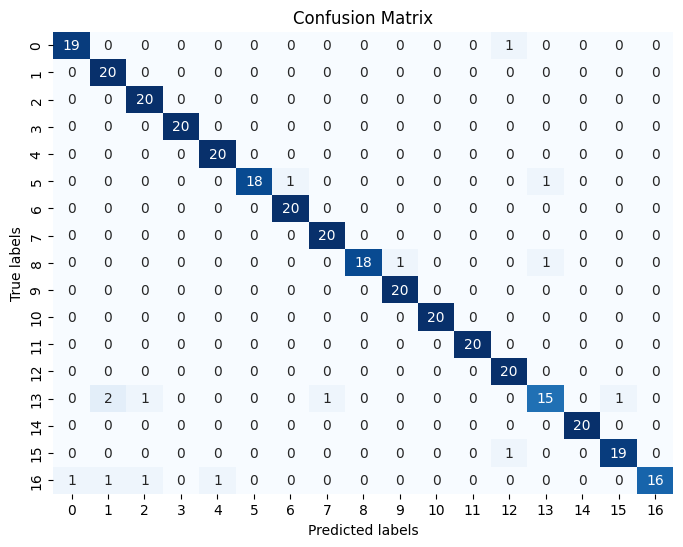

In [ ]:
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, ensemble_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
precision = precision_score(y_test, ensemble_predictions, average='weighted')
recall = recall_score(y_test, ensemble_predictions, average='weighted')
f1 = f1_score(y_test, ensemble_predictions, average='weighted')

results.append({'Model': "Voting", 'Accuracy': accuracy, 'F1-Score': f1, 'Precision': precision, 'Recall': recall})

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9576249286043177
Recall: 0.9558823529411765
F1-score: 0.9548158840645086


In [ ]:
import pandas as pd

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Display results as table
print(df_results)

       Model  Accuracy  F1-Score  Precision    Recall
0        CNN  0.832353  0.830158   0.838840  0.832353
1   Rsenet50  0.920588  0.918893   0.926373  0.920588
2      Vgg16  0.905882  0.903648   0.911232  0.905882
3  Efficient  0.932353  0.932318   0.938093  0.932353
4     Voting  0.955882  0.954816   0.957625  0.955882
